In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
import statsmodels.api as sm

In [5]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [9]:
# 비정상 데이터
df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [10]:
# 정상 데이터
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D' # 일간

In [11]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### 임시

In [14]:
df = pd.DataFrame({'a': [13,5,11,12,9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [15]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [19]:
pacf_yw(df['a'], nlags=4, method='mle') # mle: 편향 자기상관 계수, 최대 우도 추정법의 약자

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [21]:
# 율-워커 부분 자기상관 함수
pacf_yw(df['a'], nlags=4, method='adjusted')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [22]:
# 최소 제곱법의 부분 자기상관 함수
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

---

In [23]:
from pandas.plotting import lag_plot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

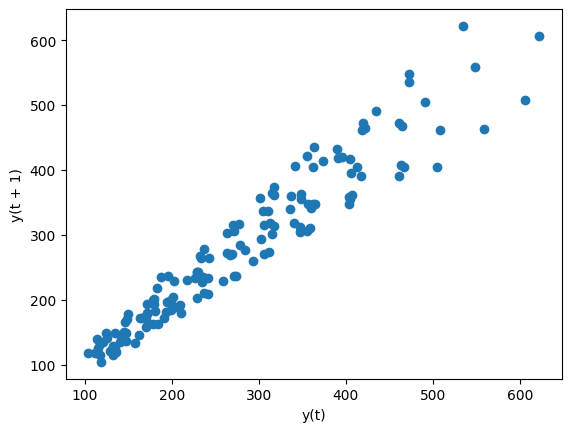

In [24]:

lag_plot(df1['Thousands of Passengers'])

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

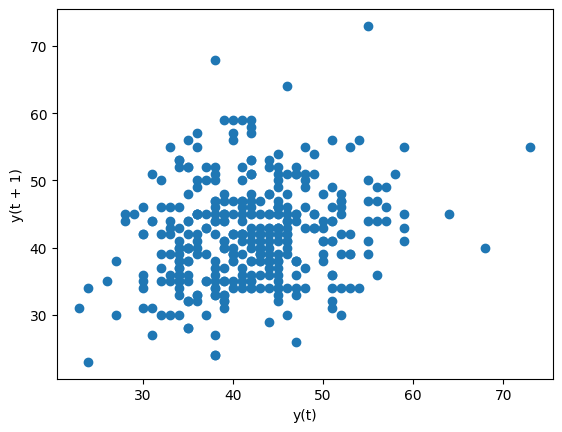

In [25]:
lag_plot(df2['Births'])

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot: xlabel='Month'>

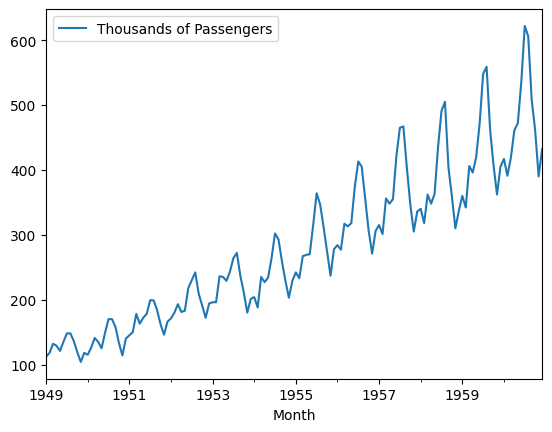

In [27]:
df1.plot()

<AxesSubplot: xlabel='Date'>

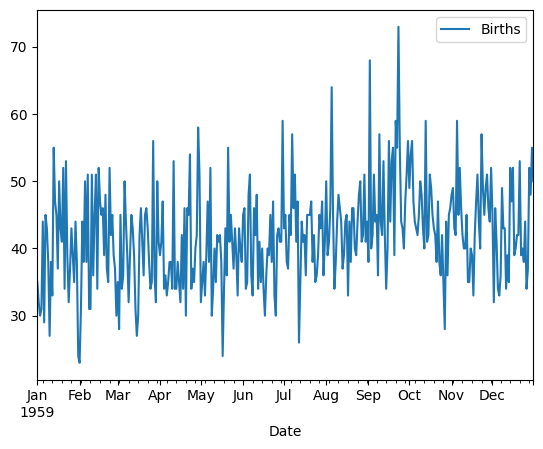

In [33]:
df2.plot()

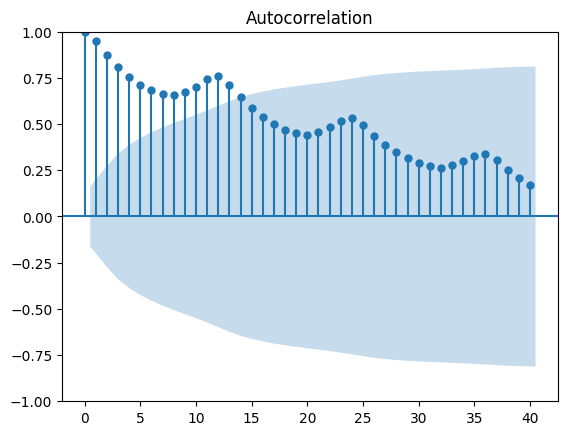

In [30]:
plot_acf(df1, lags=40); # 비정상 데이터의 자기상관 플롯

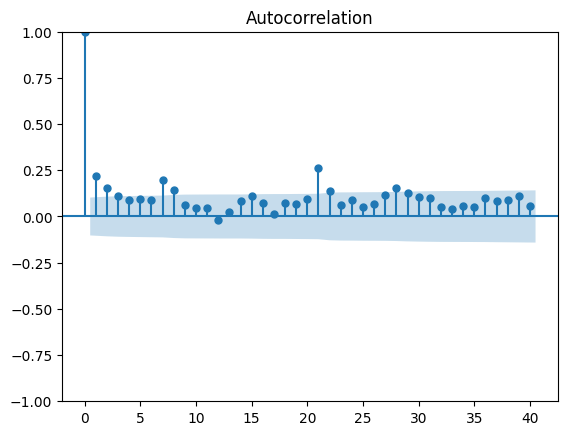

In [32]:
plot_acf(df2, lags=40); # 정상 데이터의 자기상관 플롯

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


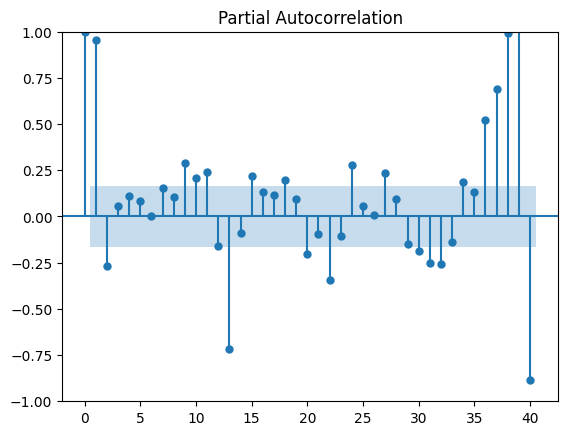

In [36]:
plot_pacf(df1, lags=40);

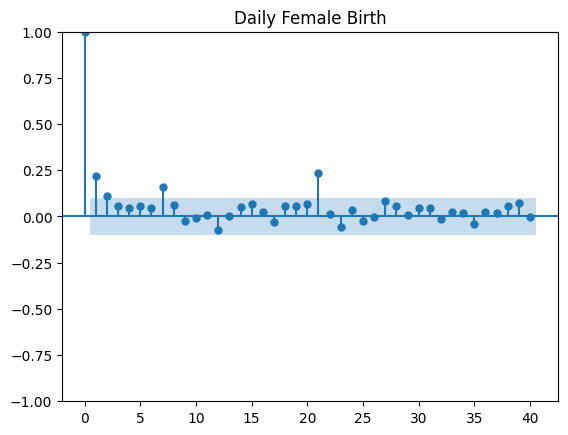

In [35]:
plot_pacf(df2, lags=40, title='Daily Female Birth');